In [201]:
import numpy as np
import random
import os
import subprocess
import time
generations = 20
epsilon_vector = np.zeros(generations)
parameters = np.zeros([20,20,20])
N = 20


In [200]:
generations

10

In [5]:
os.system('pwd')

/Users/aleksandardimitrievik/Desktop/Radboud/naco/task6


0

In [166]:
covariance_matrix = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Por ejemplo, matriz identidad

In [175]:
def ABC_sequential(cohesion_arr, separation_arr, alignment_arr, epsilon_vector = epsilon_vector, N = 20, generations = 40):
    thetas = []
    thetas_per_generation = []
    alignments_per_set = []
    alignment_per_generation = []
    i = 0
    count = 0
    while i < N:
        cohesion, separation, alignment = np.random.choice(cohesion_arr), np.random.choice(separation_arr), np.random.choice(alignment_arr)
        theta = (cohesion, separation, alignment)
        cmd = f"node boid_text.js {cohesion} {separation} {alignment}"
        output = subprocess.check_output(cmd, shell=True)
        output = output.decode("utf-8")
        align = float(output.strip())
        if np.abs(1 - align) < epsilon_vector[0]:
            print(i)
            # print(theta)
            thetas.append(theta)
            alignments_per_set.append(align)
            i += 1
    thetas = np.array(thetas)
    thetas_per_generation.append(thetas)
    alignment_per_generation.append(alignments_per_set)
    # print("original")
    print(alignments_per_set)
    for gen in range(1,generations):
        k = 0
        thetas_new = np.zeros(thetas.shape)
        alignments_per_set = []
        # print("Zeros")
        # print(thetas_new)
        print(f"Generation {gen}")
        while k < N:
            theta_star = np.copy(random.choice(thetas))
            sample = np.random.multivariate_normal(mean=np.zeros_like(theta_star), cov=covariance_matrix)
            theta_star += sample
            cohesion, separation, alignment = theta_star
            if cohesion < 1 or separation < 0 or alignment < 0:
                continue

            cmd = f"node boid_text.js {cohesion} {separation} {alignment}"
            output = subprocess.check_output(cmd, shell=True)
            output = output.decode("utf-8")
            align = float(output.strip())
            if np.abs(1 - align) < epsilon_vector[gen]:
                print(k)
                thetas_new[k] = theta_star
                alignments_per_set.append(align)
                k += 1
        
        thetas = thetas_new
        print(alignments_per_set)
        thetas_per_generation.append(thetas_new)
        alignment_per_generation.append(alignments_per_set)
    return thetas_per_generation, alignment_per_generation

In [221]:
cohesion = np.linspace(1, 300, 50)
separation = np.linspace(0, 60, 50)
alignment = np.linspace(0, 10, 50)
epsilon_vector = [1/t for t in range(1,generations+20, 2)]

# cohesion = np.linspace(50, 200, 50)
# separation = np.linspace(10, 30, 50)
# alignment = np.linspace(0, 10, 50)
# epsilon_vector = [1/(2 * t) for t in range(1,11)]
# generations = 10
# epsilon_vector[0] = 0.5

In [94]:
print(epsilon_vector[-1])

0.02564102564102564


In [184]:
thetas_per_generation, alignments_per_generations = ABC_sequential(cohesion, separation, alignment, epsilon_vector, 20, generations)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[0.11717078059232121, 0.21685279606428784, 0.10632596266033278, 0.2706094173941269, 0.1129036065920227, 0.11382689066046228, 0.17445957887150565, 0.5663258851412768, 0.2219776173441735, 0.03726281000588369, 0.15678998482394624, 0.663354037113255, 0.31481504144122974, 0.060862118180651556, 0.06790730826198771, 0.3135570415595568, 0.6060763849194515, 0.7863112806465935, 0.937179751028269, 0.15298799664316953]
Generation 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[0.9418916306298719, 0.7097730973494738, 0.920586191382278, 0.8050202511565986, 0.9353625106943648, 0.9989061746997174, 0.9853322452262555, 0.7418737435765906, 0.9030609767012208, 0.9324911880496639, 0.7310465287969402, 0.9749304933143605, 0.9207711218962976, 0.7799398512583388, 0.843766772901935, 0.8653845787841967, 0.9741739146407926, 0.9704104594809363, 0.9155575450529844, 0.9131586519526176]
Generation 2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[0.99958623225

In [50]:
print(thetas)

[(41.61224489795919, 38.40816326530612, 2.857142857142857), array([130.89657741,   1.09807092,   7.39733563]), array([85.91925311, 21.14378866,  6.90912565]), array([ 0.8659308 , 14.49713701,  3.18292286]), array([142.00131461,   9.33433621,   3.00999418]), array([ 1.14782885, 16.792204  ,  5.2571909 ]), array([83.26634377, 25.29414286,  1.58206296]), array([131.15458937,   2.28009052,   7.89421315]), array([ 1.71390872, 11.76487036,  8.87511422]), array([ 0.8659308 , 14.49713701,  3.18292286]), array([ 0.8659308 , 14.49713701,  3.18292286]), array([132.39316633,   2.41589325,   7.16257755]), array([ 0.8659308 , 14.49713701,  3.18292286]), array([-0.90578439, 17.10619971,  3.5456227 ]), array([132.39316633,   2.41589325,   7.16257755]), array([40.43694142, 37.56458672,  2.55167183]), array([ 1.71390872, 11.76487036,  8.87511422]), array([ 1.71390872, 11.76487036,  8.87511422]), array([ 1.71390872, 11.76487036,  8.87511422]), array([ 0.8659308 , 14.49713701,  3.18292286])]


In [7]:
list(range(1, 10, 2))

[1, 3, 5, 7, 9]

In [160]:
thetas_60 = thetas_per_generation
aligns_60 = alignments_per_generations

In [228]:
thetas_per_generation[1]

array([[8.69959669e+01, 1.95610247e+00, 2.94802987e+00],
       [1.59368753e+02, 4.86921177e+01, 7.96217467e-02],
       [1.53279438e+02, 2.06454368e+01, 7.52045733e-01],
       [2.33359289e+02, 4.85883244e+01, 2.86732891e-01],
       [1.84424370e+02, 3.37043035e+01, 5.75165629e-01],
       [9.73991980e+01, 6.64918501e+00, 7.02052374e-01],
       [9.78106837e+01, 4.86748394e+00, 1.97518793e+00],
       [9.97867110e+01, 3.61811059e+00, 2.97129196e+00],
       [9.77697993e+01, 4.80671293e+00, 1.99503469e+00],
       [1.54320218e+02, 2.00040753e+01, 1.66200318e+00],
       [2.32695875e+02, 4.95054637e+01, 9.01510233e-01],
       [1.52828366e+02, 2.06100874e+01, 1.65344692e+00],
       [1.85825838e+02, 3.30262500e+01, 2.65962678e-01],
       [9.70914755e+01, 6.34619950e+00, 2.09442220e+00],
       [1.84644376e+02, 3.35846548e+01, 3.59365847e-01],
       [8.58601031e+01, 1.81420964e+00, 2.89739707e+00],
       [1.54086276e+02, 1.75785482e+01, 1.95560937e+00],
       [8.60470774e+01, 1.67154

In [163]:
thetas_60

[array([[202.36734694,  34.28571429,   2.04081633],
        [251.18367347,  19.59183673,   3.46938776],
        [281.69387755,  14.69387755,   8.36734694],
        [123.04081633,  34.28571429,   6.12244898],
        [  1.        ,  17.14285714,   3.26530612],
        [ 55.91836735,  15.91836735,   0.81632653],
        [135.24489796,   3.67346939,   3.26530612],
        [ 80.32653061,  57.55102041,   7.14285714],
        [287.79591837,   2.44897959,   2.04081633],
        [232.87755102,  37.95918367,   7.95918367],
        [238.97959184,   7.34693878,   6.53061224],
        [ 80.32653061,  30.6122449 ,   6.93877551],
        [110.83673469,  12.24489796,   6.93877551],
        [293.89795918,  36.73469388,   4.28571429],
        [ 31.51020408,   9.79591837,   0.6122449 ],
        [ 13.20408163,  28.16326531,   7.95918367],
        [269.48979592,  60.        ,   1.2244898 ],
        [116.93877551,   3.67346939,   3.87755102],
        [245.08163265,  41.63265306,   0.40816327],
        [293

In [164]:
aligns_60

[[0.3590974262238713,
  0.19411348787143903,
  0.15844143453530016,
  0.11089010095068723,
  0.3409487635954419,
  0.9957238971766997,
  0.5078658939590077,
  0.24514881765142937,
  0.8137928491948586,
  0.2535948133053888,
  0.1746975214628928,
  0.018868766564895438,
  0.3200285411700457,
  0.15102898719335606,
  0.9339266797840663,
  0.20643562616309408,
  0.35697834708511367,
  0.38186749394126224,
  0.8209620671689932,
  0.16651902137919908],
 [0.6946889003055238,
  0.45599905046710915,
  0.26947938615150735,
  0.3996542739116572,
  0.33004650208374753,
  0.5280089097229587,
  0.4038383237435536,
  0.46105783267294587,
  0.27937650475136233,
  0.3470306642564872,
  0.357185767846541,
  0.9078795601590441,
  0.790151722871069,
  0.2868324927429819,
  0.8510830418291503,
  0.5257525417691757,
  0.8733170974727328,
  0.6585086705044095,
  0.3273873860442588,
  0.859370470848149],
 [0.4453999421314499,
  0.7414360234603441,
  0.4440972454463045,
  0.4309766804778942,
  0.5779442019762

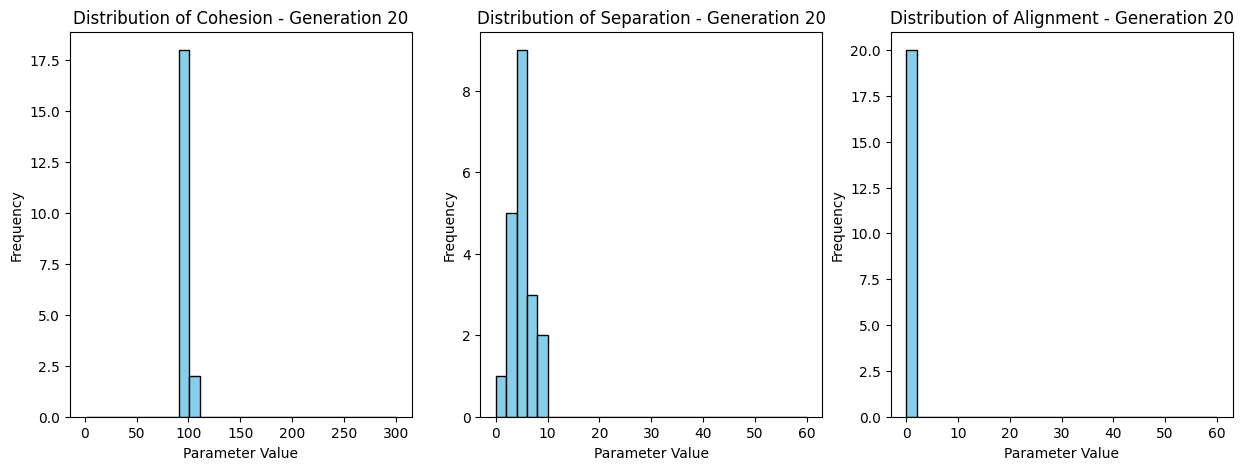

In [212]:
plt.figure(figsize=(15, 5))

# I will show the distribution of the parameters for the first generation
thetas_0 = np.array(thetas_per_generation[9])
aligns_0 = np.array(alignments_per_generations[9])

plt.subplot(1, 3, 1)
plt.hist(thetas_0[:,0].flatten(), bins=30, range=(1,300), color='skyblue', edgecolor='black')
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.title('Distribution of Cohesion - Generation 20')
# plt.show()

plt.subplot(1, 3, 2)
plt.hist(thetas_0[:,1].flatten(), bins=30, range=(0,60), color='skyblue', edgecolor='black')
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.title('Distribution of Separation - Generation 20')
# plt.show()

plt.subplot(1, 3, 3)
plt.hist(thetas_0[:,2].flatten(), bins=30, range=(0,60), color='skyblue', edgecolor='black')
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.title('Distribution of Alignment - Generation 20')
plt.show()

In [199]:
thetas_per_generation[9]

array([[9.81935305e+01, 3.19573597e+00, 1.94579254e+00],
       [9.61073285e+01, 8.73345747e+00, 1.14466446e+00],
       [1.00021258e+02, 5.22204441e+00, 4.41230493e-01],
       [9.73329170e+01, 6.20571469e+00, 1.93709453e+00],
       [9.88913465e+01, 2.31889074e+00, 9.87427133e-01],
       [9.78896114e+01, 4.61371258e+00, 7.82445905e-02],
       [1.00827337e+02, 4.89763722e+00, 6.11938361e-01],
       [9.56320216e+01, 5.25763040e+00, 1.99506926e+00],
       [1.00197620e+02, 5.24183982e+00, 1.52915495e+00],
       [9.94248727e+01, 6.48470473e+00, 1.50646639e+00],
       [9.94082299e+01, 8.12832829e+00, 9.72975079e-01],
       [9.83515714e+01, 4.73797269e+00, 1.01832656e+00],
       [9.73046697e+01, 4.33594522e+00, 3.45219842e-01],
       [1.01846215e+02, 3.67999423e+00, 1.06224889e+00],
       [9.75798852e+01, 5.80409631e+00, 7.23470989e-01],
       [9.96874313e+01, 3.74983305e+00, 9.22784669e-01],
       [9.67822791e+01, 7.98463813e-01, 1.15575597e+00],
       [9.92400027e+01, 3.66000

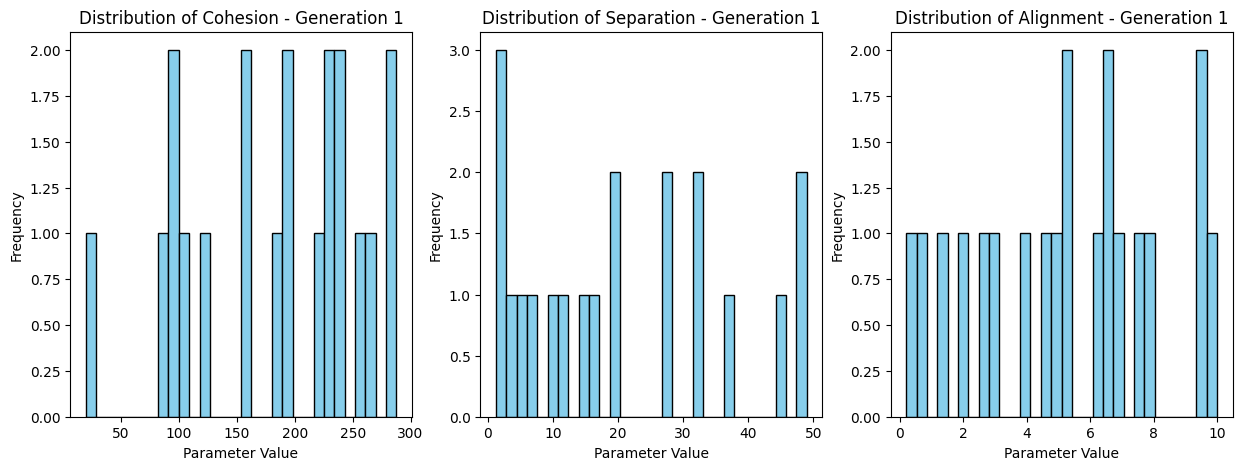

In [211]:
plt.figure(figsize=(15, 5))


# I will show the distribution of the parameters for the first generation
thetas_0 = np.array(thetas_per_generation[0])
aligns_0 = np.array(alignments_per_generations[0])

plt.subplot(1, 3, 1)
plt.hist(thetas_0[:,0].flatten(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.title('Distribution of Cohesion - Generation 1')
# plt.show()

plt.subplot(1, 3, 2)
plt.hist(thetas_0[:,1].flatten(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.title('Distribution of Separation - Generation 1')
# plt.show()

plt.subplot(1, 3, 3)
plt.hist(thetas_0[:,2].flatten(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.title('Distribution of Alignment - Generation 1')
plt.show()

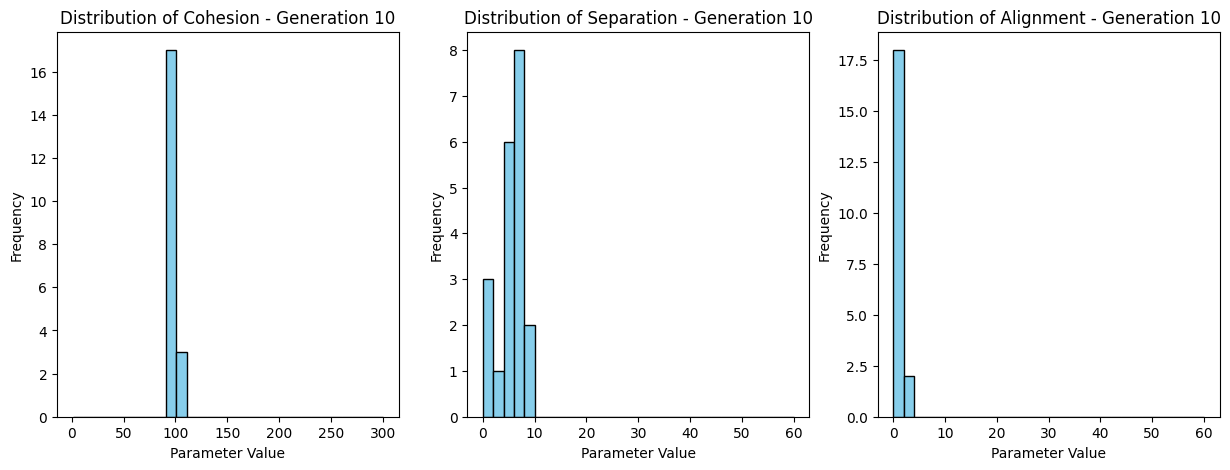

In [210]:
plt.figure(figsize=(15, 5))


# I will show the distribution of the parameters for the first generation
thetas_0 = np.array(thetas_per_generation[5])
aligns_0 = np.array(alignments_per_generations[5])

plt.subplot(1, 3, 1)
plt.hist(thetas_0[:,0].flatten(), bins=30, range=(1,300), color='skyblue', edgecolor='black')
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.title('Distribution of Cohesion - Generation 10')
# plt.show()

plt.subplot(1, 3, 2)
plt.hist(thetas_0[:,1].flatten(), bins=30, range=(0,60), color='skyblue', edgecolor='black')
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.title('Distribution of Separation - Generation 10')
# plt.show()

plt.subplot(1, 3, 3)
plt.hist(thetas_0[:,2].flatten(), bins=30, range=(0,60), color='skyblue', edgecolor='black')
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.title('Distribution of Alignment - Generation 10')
plt.show()

Text(0.5, 1.0, 'General Alignment - Generation 20')

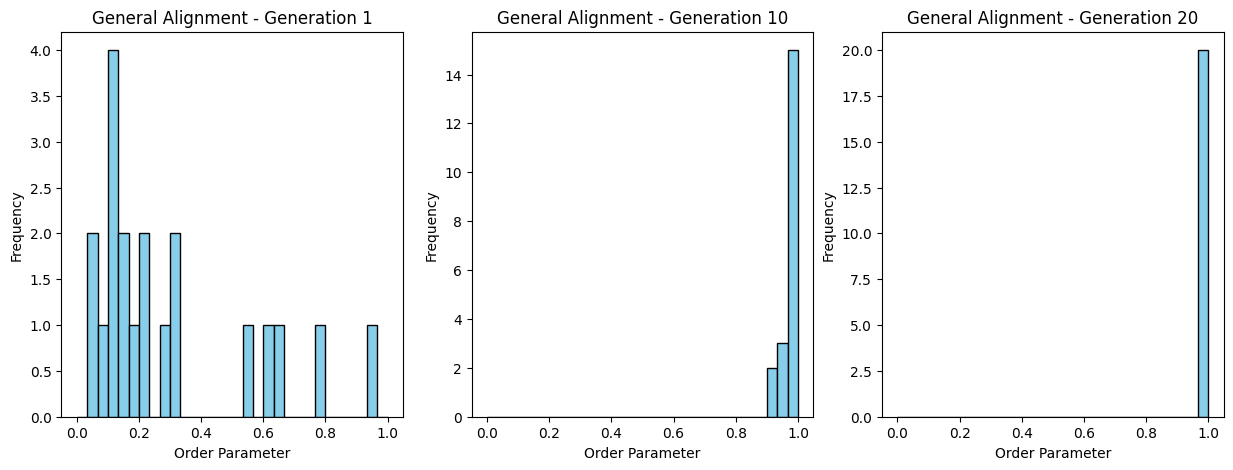

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))


# I will show the distribution of the parameters for the first generation
# thetas_0 = np.array(thetas_per_generation[5])
aligns_0 = np.array(alignments_per_generations[0])
aligns_10 = np.array(alignments_per_generations[5])
aligns_20 = np.array(alignments_per_generations[9])

plt.subplot(1, 3, 1)
plt.hist(aligns_0, bins=30, range=(0,1), color='skyblue', edgecolor='black')
plt.xlabel('Order Parameter')
plt.ylabel('Frequency')
plt.title('General Alignment - Generation 1')
# plt.show()

plt.subplot(1, 3, 2)
plt.hist(aligns_10, bins=30, range=(0,1), color='skyblue', edgecolor='black')
plt.xlabel('Order Parameter')
plt.ylabel('Frequency')
plt.title('General Alignment - Generation 10')
# plt.show()

plt.subplot(1, 3, 3)
plt.hist(aligns_20, bins=30, range=(0,1), color='skyblue', edgecolor='black')
plt.xlabel('Order Parameter')
plt.ylabel('Frequency')
plt.title('General Alignment - Generation 20')

Text(0.5, 1.0, 'General Alignment - Generation 20')

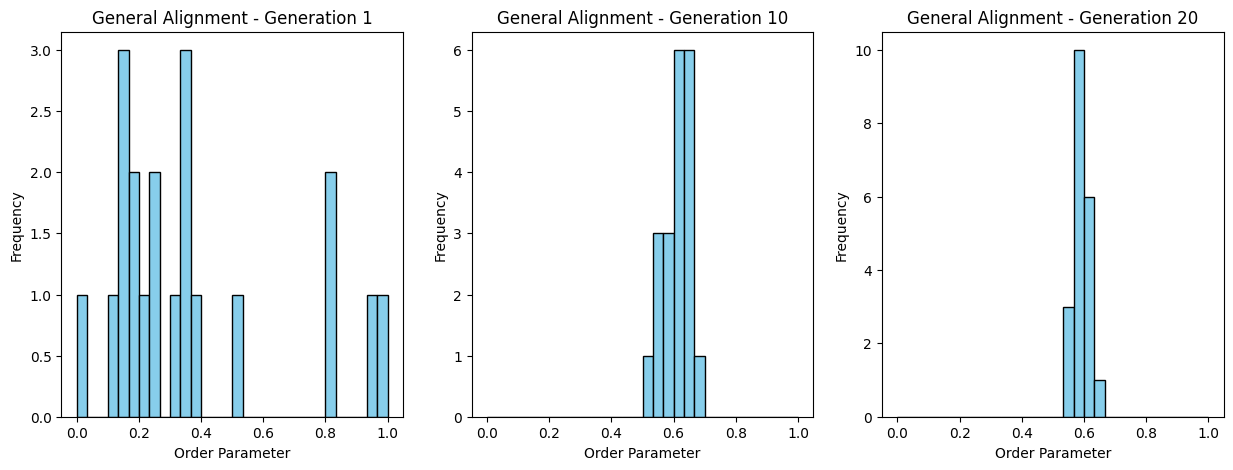

In [216]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))


# I will show the distribution of the parameters for the first generation
# thetas_0 = np.array(thetas_per_generation[5])
aligns_0 = np.array(aligns_60[0])
aligns_10 = np.array(aligns_60[5])
aligns_20 = np.array(aligns_60[9])

plt.subplot(1, 3, 1)
plt.hist(aligns_0, bins=30, range=(0,1), color='skyblue', edgecolor='black')
plt.xlabel('Order Parameter')
plt.ylabel('Frequency')
plt.title('General Alignment - Generation 1')
# plt.show()

plt.subplot(1, 3, 2)
plt.hist(aligns_10, bins=30, range=(0,1), color='skyblue', edgecolor='black')
plt.xlabel('Order Parameter')
plt.ylabel('Frequency')
plt.title('General Alignment - Generation 10')
# plt.show()

plt.subplot(1, 3, 3)
plt.hist(aligns_20, bins=30, range=(0,1), color='skyblue', edgecolor='black')
plt.xlabel('Order Parameter')
plt.ylabel('Frequency')
plt.title('General Alignment - Generation 20')

In [219]:
min_cohesion_1 = np.min(thetas_per_generation[-1][:,0])
min_separation_1 = np.min(thetas_per_generation[-1][:,1])
min_alignment_1 = np.min(thetas_per_generation[-1][:,2])

max_cohesion_1 = np.max(thetas_per_generation[-1][:,0])
max_separation_1 = np.max(thetas_per_generation[-1][:,1])
max_alignment_1 = np.max(thetas_per_generation[-1][:,2])

mean_cohesion_1 = np.mean(thetas_per_generation[-1][:,0])
mean_separation_1 = np.mean(thetas_per_generation[-1][:,1])
mean_alignment_1 = np.mean(thetas_per_generation[-1][:,2])

min_cohesion_60 = np.min(thetas_60[-1][:,0])
min_separation_60 = np.min(thetas_60[-1][:,1])
min_alignment_60 = np.min(thetas_60[-1][:,2])

max_cohesion_60 = np.max(thetas_60[-1][:,0])
max_separation_60 = np.max(thetas_60[-1][:,1])
max_alignment_60 = np.max(thetas_60[-1][:,2])

mean_cohesion_60 = np.mean(thetas_60[-1][:,0])
mean_separation_60 = np.mean(thetas_60[-1][:,1])
mean_alignment_60 = np.mean(thetas_60[-1][:,2])

print(f"Min Cohesion 1: {min_cohesion_1}, Min Separation 1: {min_separation_1}, Min Alignment 1: {min_alignment_1}")
print(f"Max Cohesion 1: {max_cohesion_1}, Max Separation 1: {max_separation_1}, Max Alignment 1: {max_alignment_1}")
print(f"Min Cohesion 60: {min_cohesion_60}, Min Separation 60: {min_separation_60}, Min Alignment 60: {min_alignment_60}")
print(f"Max Cohesion 60: {max_cohesion_60}, Max Separation 60: {max_separation_60}, Max Alignment 60: {max_alignment_60}")  
print(f"Mean Cohesion 1: {mean_cohesion_1}, Mean Separation 1: {mean_separation_1}, Mean Alignment 1: {mean_alignment_1}")
print(f"Mean Cohesion 60: {mean_cohesion_60}, Mean Separation 60: {mean_separation_60}, Mean Alignment 60: {mean_alignment_60}")


Min Cohesion 1: 95.6320216136432, Min Separation 1: 0.7984638134124737, Min Alignment 1: 0.07824459054508026
Max Cohesion 1: 101.84621494926083, Max Separation 1: 8.733457465088005, Max Alignment 1: 1.99506925613843
Min Cohesion 60: 207.80744085529926, Min Separation 60: 34.812198759024625, Min Alignment 60: 0.00027782120374297836
Max Cohesion 60: 254.57848445039724, Max Separation 60: 46.633148212895776, Max Alignment 60: 1.755753838626867
Mean Cohesion 1: 98.55212088776125, Mean Separation 1: 4.94812832921673, Mean Alignment 1: 1.1375904773685608
Mean Cohesion 60: 248.12501383363065, Mean Separation 60: 39.79523958099007, Mean Alignment 60: 0.8141098253180962


In [220]:
thetas_per_generation[-1][:,1]

array([3.19573597, 8.73345747, 5.22204441, 6.20571469, 2.31889074,
       4.61371258, 4.89763722, 5.2576304 , 5.24183982, 6.48470473,
       8.12832829, 4.73797269, 4.33594522, 3.67999423, 5.80409631,
       3.74983305, 0.79846381, 3.66000583, 4.40259573, 7.49396339])